<center><h1>Practice Project: Data Exploration</h1></center>

## Importing Necessary Libraries for Data Exploration

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # Apply the default seaborn theme, scaling, and color palette

import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

## About Dataset
This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

### Attributes

* $price =$ price in US dollars (\\$326--\\$18,823)
* $carat =$ weight of the diamond (0.2--5.01)
* $cut =$ quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* $color =$ diamond colour, from J (worst) to D (best)
* $clarity =$ a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* $x =$ length in mm (0--10.74)
* $y =$ width in mm (0--58.9)
* $z =$ depth in mm (0--31.8)
* $depth =$ total depth percentage = $z / mean(x, y) = 2 * z / (x + y) (43--79)$
* $table =$ width of top of diamond relative to widest point (43--95)

## Load the Dataset

In [2]:
diamonds = sns.load_dataset("diamonds")  # Loaded in a Pandas DataFrame
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Statistics for carat:
  Mean: 0.7979397478680014
  Median: 0.7
  Mode: 0.3
  Min: 0.2
  Max: 5.01


Statistics for depth:
  Mean: 61.749404894327036
  Median: 61.8
  Mode: 62.0
  Min: 43.0
  Max: 79.0


Statistics for table:
  Mean: 57.45718390804598
  Median: 57.0
  Mode: 56.0
  Min: 43.0
  Max: 95.0


Statistics for price:
  Mean: 3932.799721913237
  Median: 2401.0
  Mode: 605
  Min: 326
  Max: 18823


Statistics for x:
  Mean: 5.731157211716722
  Median: 5.7
  Mode: 4.37
  Min: 0.0
  Max: 10.74


Statistics for y:
  Mean: 5.734525954764553
  Median: 5.71
  Mode: 4.34
  Min: 0.0
  Max: 58.9


Statistics for z:
  Mean: 3.5387337782721544
  Median: 3.53
  Mode: 2.7
  Min: 0.0
  Max: 31.8




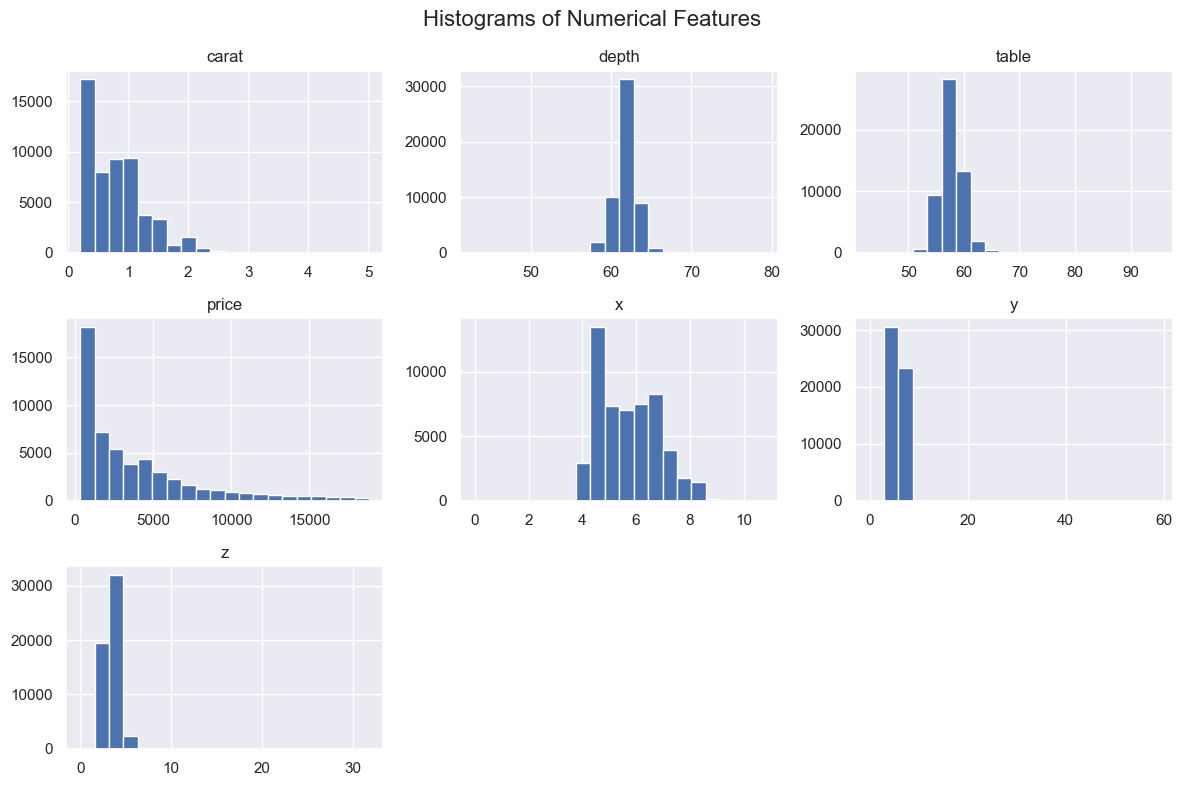

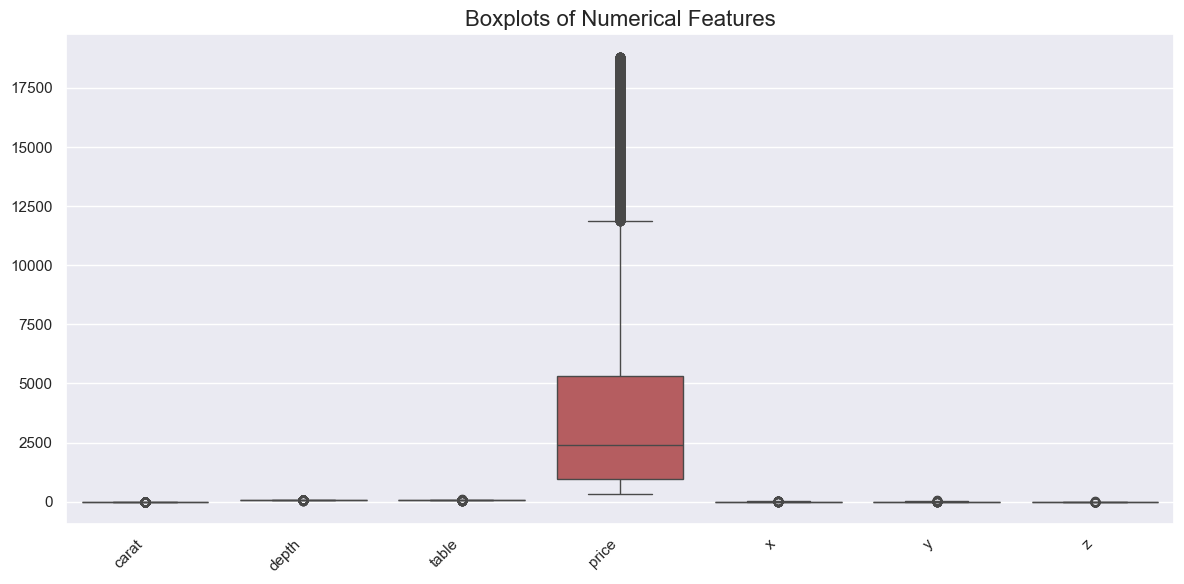

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataset is loaded into a Pandas DataFrame called 'diamonds'

# Calculate mean, median, mode, min, max
for column in diamonds.select_dtypes(include=['number']).columns:
    mean = diamonds[column].mean()
    median = diamonds[column].median()
    mode = diamonds[column].mode()[0]  # Mode can have multiple values, taking the first one
    minimum = diamonds[column].min()
    maximum = diamonds[column].max()
    
    print(f"Statistics for {column}:")
    print(f"  Mean: {mean}")
    print(f"  Median: {median}")
    print(f"  Mode: {mode}")
    print(f"  Min: {minimum}")
    print(f"  Max: {maximum}")
    print("\n")

# Create histograms
diamonds.hist(figsize=(12, 8), bins=20) 
plt.suptitle("Histograms of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# Create boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(data=diamonds)
plt.title("Boxplots of Numerical Features", fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## 1.0 Variable Identification

In [3]:
diamonds.dtypes

carat       float64
cut        category
color      category
clarity    category
depth       float64
table       float64
price         int64
x           float64
y           float64
z           float64
dtype: object

In [4]:
diamonds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


## 2.0 Univariate Analysis

### 2.1 For continuous variables: mean, median, mode, min, max, histograms (distribution), and boxplots

Statistics for carat:
  Mean: 0.7979397478680014
  Median: 0.7
  Mode: 0.3
  Min: 0.2
  Max: 5.01




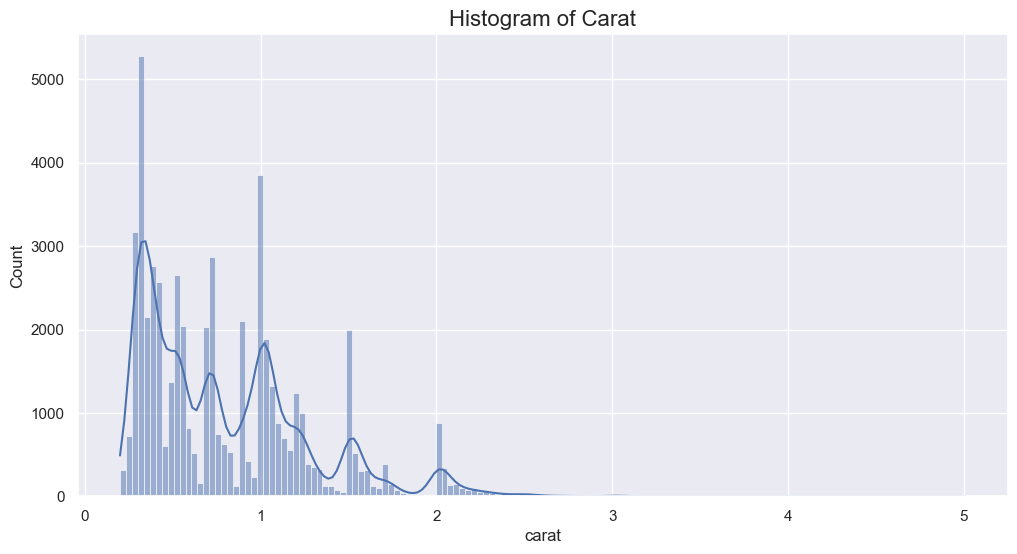

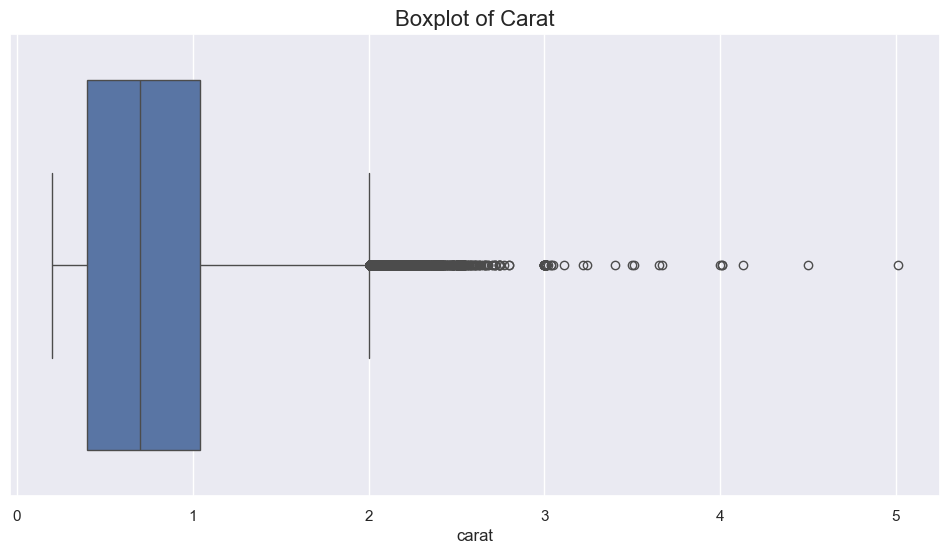

In [8]:
# Calculate mean, median, mode, min, max for continuous variables
mean_carat = diamonds['carat'].mean()
median_carat = diamonds['carat'].median()
mode_carat = diamonds['carat'].mode()[0]
min_carat = diamonds['carat'].min()
max_carat = diamonds['carat'].max()

# Print the statistics
print(f"Statistics for carat:")
print(f"  Mean: {mean_carat}")
print(f"  Median: {median_carat}")
print(f"  Mode: {mode_carat}")
print(f"  Min: {min_carat}")
print(f"  Max: {max_carat}")
print("\n")

# Create histogram for carat
plt.figure(figsize=(12, 6))
sns.histplot(diamonds['carat'], kde=True)
plt.title("Histogram of Carat", fontsize=16)
plt.show()

# Create boxplot for carat
plt.figure(figsize=(12, 6))
sns.boxplot(x=diamonds['carat'])
plt.title("Boxplot of Carat", fontsize=16)
plt.show()


In [5]:
diamonds.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
diamonds.describe(include=['category'])

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


### 2.2 For categorical variables: frequency table, count plot

Frequency table for cut:
cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64




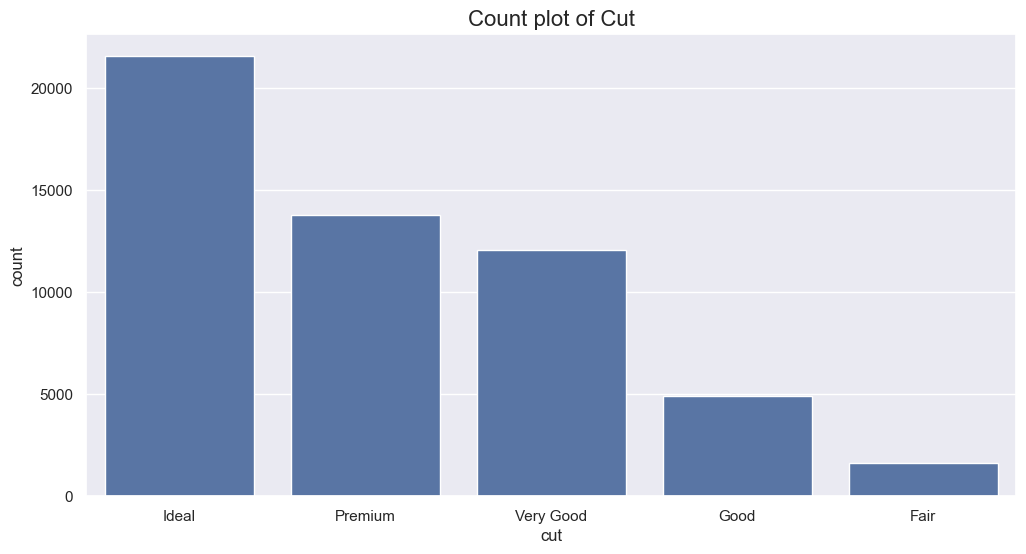

Frequency table for color:
color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64




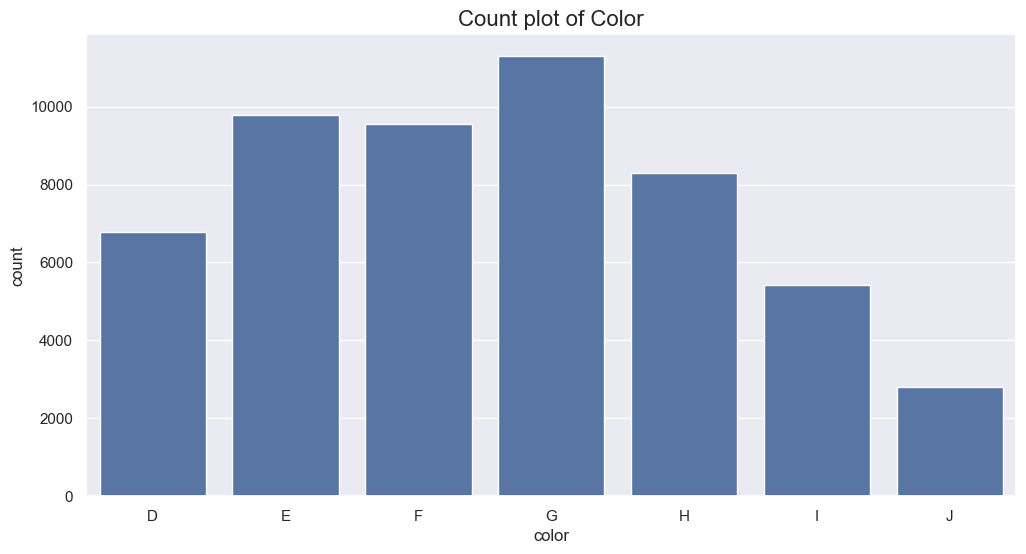

Frequency table for clarity:
clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: count, dtype: int64




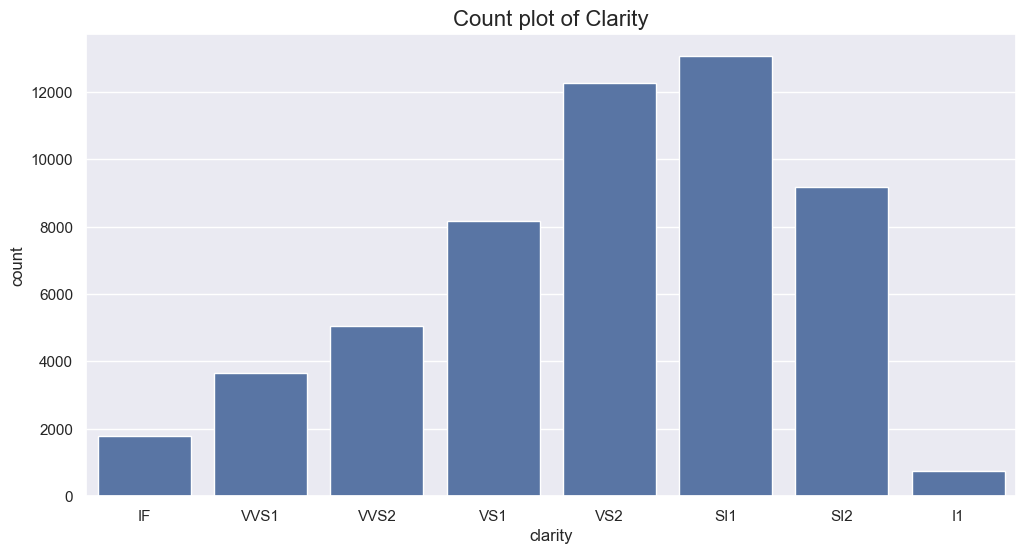

In [9]:
# Frequency table for cut
cut_frequency = diamonds['cut'].value_counts()
print(f"Frequency table for cut:")
print(cut_frequency)
print("\n")

# Count plot for cut
plt.figure(figsize=(12, 6))
sns.countplot(x='cut', data=diamonds)
plt.title("Count plot of Cut", fontsize=16)
plt.show()

# Frequency table for color
color_frequency = diamonds['color'].value_counts()
print(f"Frequency table for color:")
print(color_frequency)
print("\n")

# Count plot for color
plt.figure(figsize=(12, 6))
sns.countplot(x='color', data=diamonds)
plt.title("Count plot of Color", fontsize=16)
plt.show()

# Frequency table for clarity
clarity_frequency = diamonds['clarity'].value_counts()
print(f"Frequency table for clarity:")
print(clarity_frequency)
print("\n")

# Count plot for clarity
plt.figure(figsize=(12, 6))
sns.countplot(x='clarity', data=diamonds)
plt.title("Count plot of Clarity", fontsize=16)
plt.show()


## 3.0 Bi-variate Analysis

### 3.1 Continuous \& Continuous: scatter plots

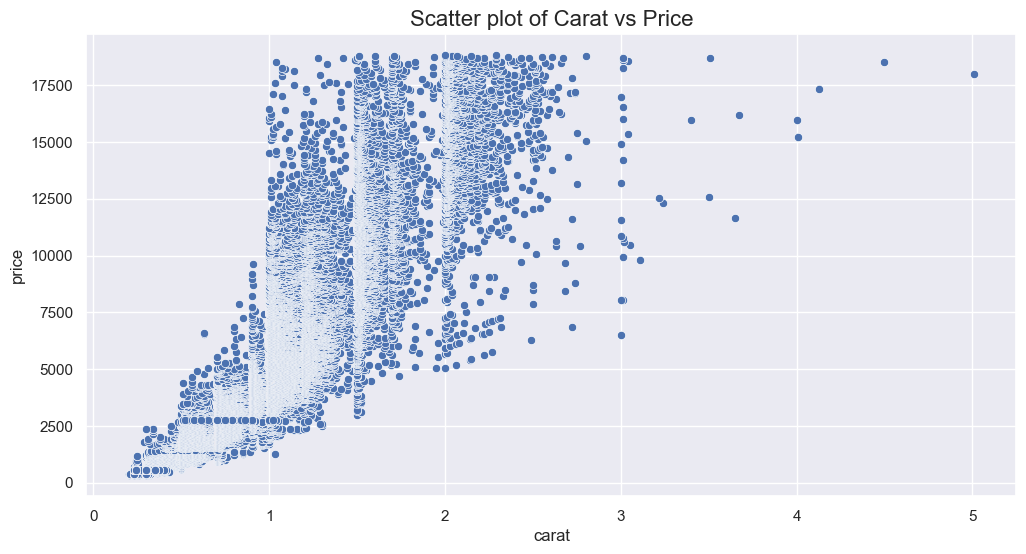

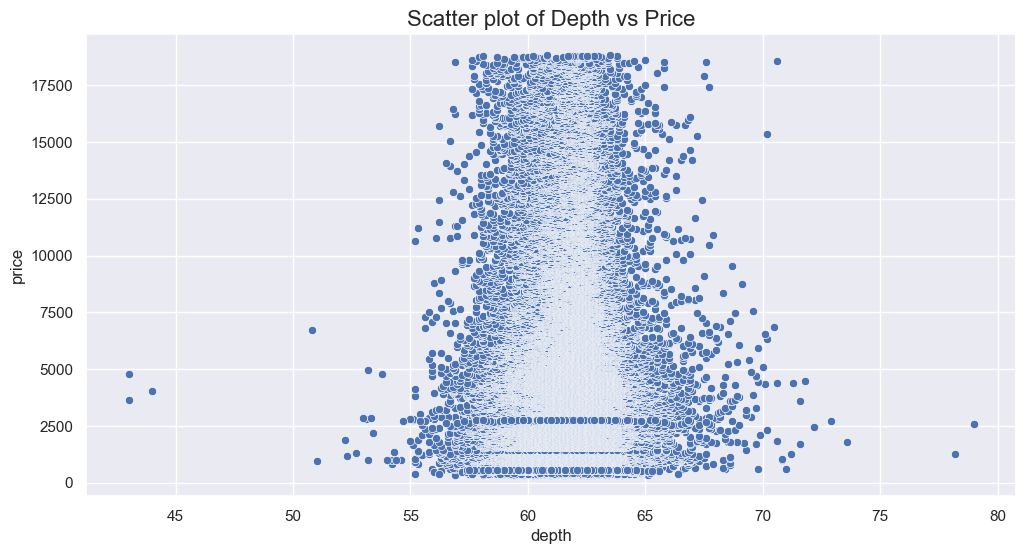

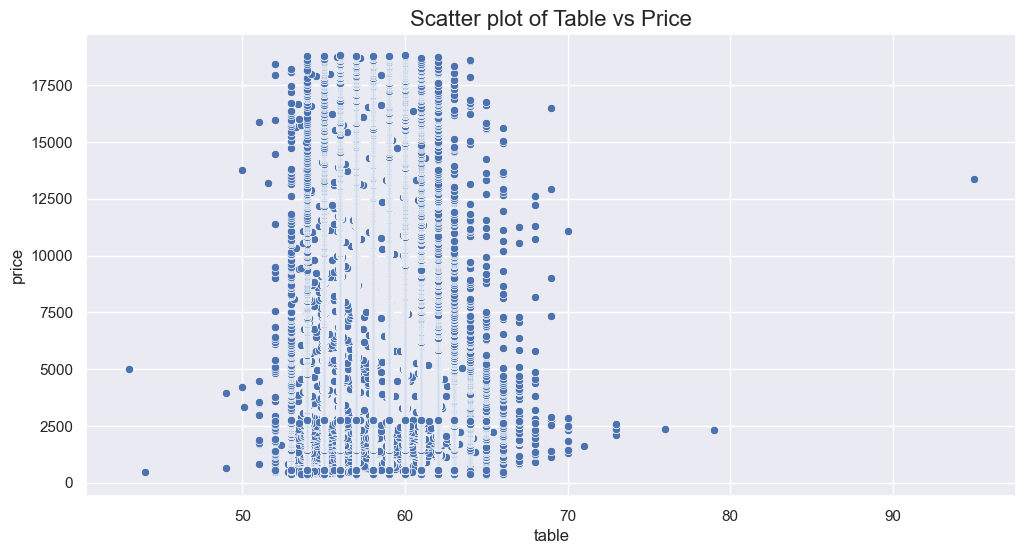

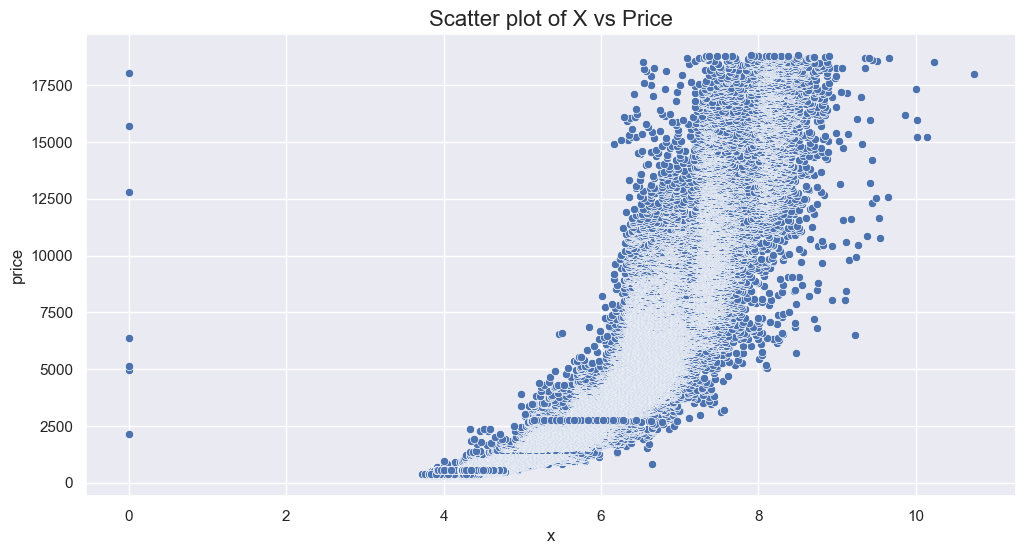

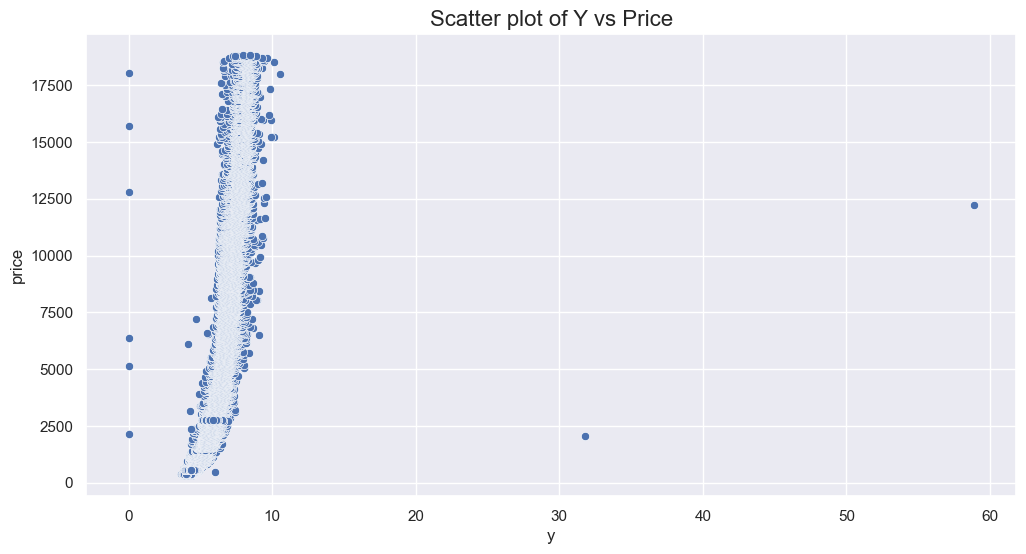

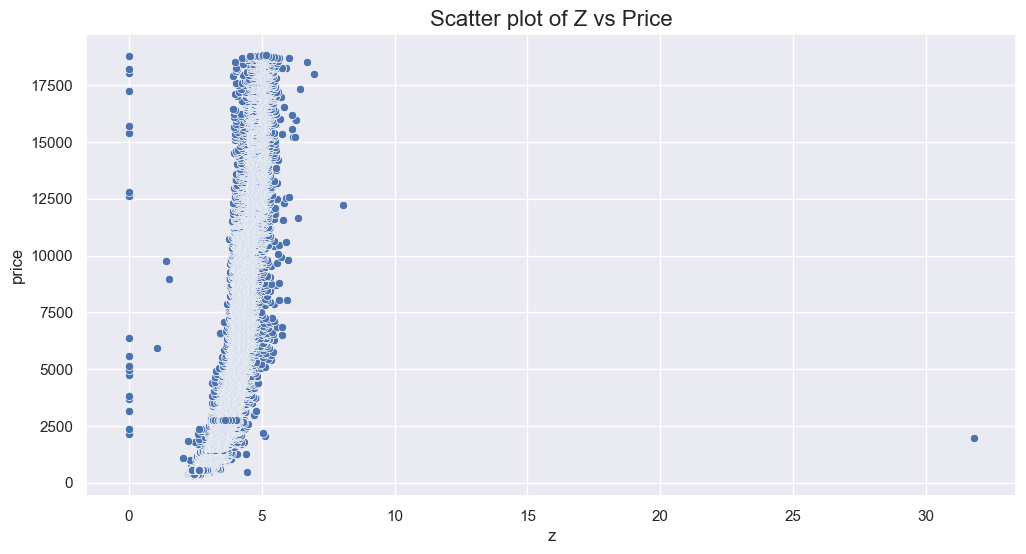

In [10]:
# Scatter plot for carat vs price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='carat', y='price', data=diamonds)
plt.title("Scatter plot of Carat vs Price", fontsize=16)
plt.show()

# Scatter plot for depth vs price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='depth', y='price', data=diamonds)
plt.title("Scatter plot of Depth vs Price", fontsize=16)
plt.show()

# Scatter plot for table vs price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='table', y='price', data=diamonds)
plt.title("Scatter plot of Table vs Price", fontsize=16)
plt.show()

# Scatter plot for x vs price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='x', y='price', data=diamonds)
plt.title("Scatter plot of X vs Price", fontsize=16)
plt.show()

# Scatter plot for y vs price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='y', y='price', data=diamonds)
plt.title("Scatter plot of Y vs Price", fontsize=16)
plt.show()

# Scatter plot for z vs price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='z', y='price', data=diamonds)
plt.title("Scatter plot of Z vs Price", fontsize=16)
plt.show()


### 3.2 Categorical & Categorical: stacked column chart

### 3.3 Categorical & Continuous: boxplots

### 3.4 Correlation Analysis: correlation matrix

## 4.0 Missing Value Analysis

In [14]:
diamonds.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## 5.0 Outlier Analysis

## 6.0 Class Imbalance Analysis

**Note:** This is not a classification problem. Here the target variable is $price$. You can just explore the frequency table of some categorical variables.

In [15]:
diamonds["cut"].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64